In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # #                                         # # # # # # #
# # # # # # #             Dimple Surface              # # # # # # # 
# # # # # # #                                         # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [2]:
from veech import *

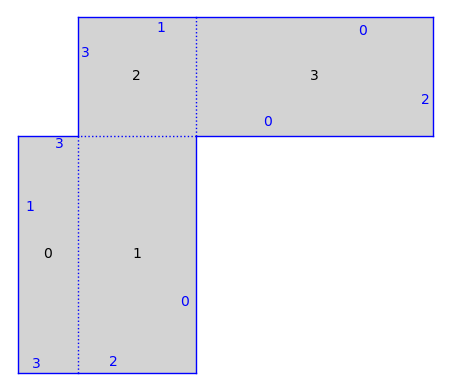

In [75]:
def dimple(x,y):

    def rectangle(a,b):
        return polygons(vertices = [(0,0),(a,0),(a,b),(0,b)])

    P1 = rectangle(x,y)
    Q1 = rectangle(1,y)
    R1 = rectangle(1,1)
    S1 = rectangle(y,1)
    
    s = Surface_list(QQ)

    s.add_polygon(P1)
    s.add_polygon(Q1)
    s.add_polygon(R1)
    s.add_polygon(S1)

    S = SimilaritySurface(s)

    s.set_edge_pairing(0,0,3,2)
    s.set_edge_pairing(0,1,1,3)
    s.set_edge_pairing(0,2,3,0)
    s.set_edge_pairing(0,3,1,1)
    s.set_edge_pairing(1,0,2,2)
    s.set_edge_pairing(1,2,2,0)
    s.set_edge_pairing(2,1,3,3)
    s.set_edge_pairing(2,3,3,1)

    gs = S.graphical_surface()

    gs.make_adjacent(1,2)
    gs.make_adjacent(2,1)      
    
    DS = S.minimal_cover(cover_type='dilation').copy(relabel=True)
    
    return DS, S, gs, s

DS, S, gs, s = dimple(1/2,2)
gs.plot()

In [317]:
# We first imagined the Dimple surface as a (1 by 1) square torus surface
# with an (x by x) square cut out, and replaced by a (1 by y) rectangle.
# 
# Then, we chose a presentation with the cut-out in the lower-left corner.
# The simplest presentation might be the following reparameterization:
# 
# Normalize Box 2 to be a unit square, and let x and y vary as the height and width of Box 0, respectively.
#
# The horizontal left-right sheers are generated by    [[1,z],    where  z = lcm( (x + 1)/y, y + 1).
#                                                       [0,1]]                   
# 
# The vertical up-down sheers are generated by         [[1, 0],   where z' = lcm(1/(y+1), xy/(y^2 + x)).
#                                                       [z',1]]
#                                                               
# This is because the surface decomposes into horizontal cylinders of moduli (x + 1)/y and y + 1,
# and it decomposes into vertical cylinders of moduli 1/(y+1) and xy/(y^2 + x).
# 
# These formulas match the results found,
# namely, the entries 6, 4, and 10 matrices for dimple(2,1), dimple(3,1), dimple(2,1).
# 
# Using FlatSurf, we are searching for Veech elements under certain simple parameters.
# Under the number of iterations we've tried so far, Flatsurf doesn't terminate,
# it just keeps finding more and more veech elements.

In [318]:
# DS, S, gs, s = dimple(2,1)
# IDC1 = IDC(DS, 200, veech = 1, show_current_sym = 0)
# show(IDC1.plot(model = 'UHP', figsize = 5)) #UHP or KM
# gs.plot()
# veech_matrices = list(IDC1.generators(normalize_det=1))
# show(veech_matrices)

In [19]:
all_veech_matrices = {}

In [370]:
def pprint(matrices):
    print(str([[[m[0][0],m[0][1]],[m[1][0],m[1][1]]] for m in matrices]))


IDR 3000/3000 --> 602.9 seconds


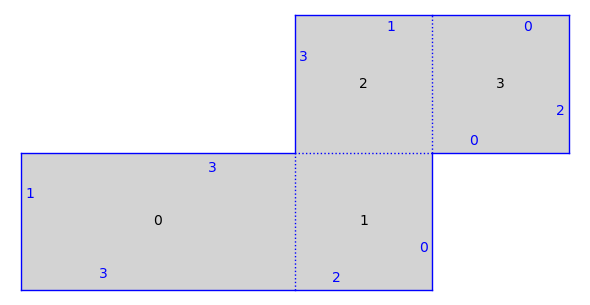

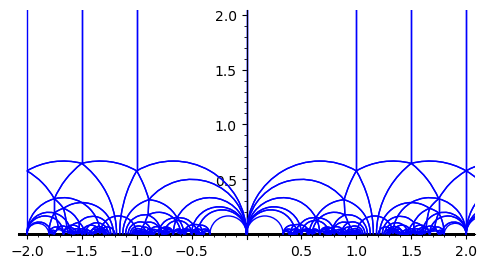

[
[161 144]  [ 119  180]  [ 31 -20]  [ 121  180]  [ 65 -53]  [ 121 -180]
[180 161], [ -80 -121], [ 45 -29], [ -80 -119], [-38  31], [  80 -119],

[    47    -77]  [ 23/2  63/2]  [ 473/2   -107]  [-15 -32]  [ 21  11]
[-119/2  195/2], [ -7/2 -19/2], [-305/2     69], [  8  17], [-44 -23],

[ 23  11]  [ -797/4 -1157/4]  [ 29  20]  [1205/4 -373/2]  [ 23 -11]
[-44 -21], [ -549/4  -797/4], [-45 -31], [-869/4  269/2], [ 44 -21],

[-455 -722]  [-23/2 -63/2]  [-19/2 -63/2]  [-14  -5]  [-205 -153]
[ 288  457], [  7/2  19/2], [  7/2  23/2], [-39 -14], [ 272  203],

[   297   -128]  [-1375/4   487/2]  [-161  144]  [65 53]
[1369/2   -295], [  991/4  -351/2], [ 180 -161], [38 31],

[-479/2  689/2]  [ 205 -153]  [  797/4 -1157/4]  [   47    77]
[ 333/2 -479/2], [ 272 -203], [ -549/4   797/4], [119/2 195/2],

[473/2   107]  [-31 -20]  [-1  6]  [ 479/2 -689/2]  [-15 -58]  [1 0]
[305/2    69], [ 45  29], [ 0 -1], [-333/2  479/2], [ -8 -31], [6 1],

[    297     128]  [   69   107]  [-23 -11]  [   -47     77]
[-1369/2    -295], [305/2 473/2], [ 44  21], [ 119/2 -195/2],

[-121  180]  [-31  20]  [-1  0]
[ -80  119], [-45  29], [ 0 -1]
]

[[[161, 144], [180, 161]], [[119, 180], [-80, -121]], [[31, -20], [45, -29]], [[121, 180], [-80, -119]], [[65, -53], [-38, 31]], [[121, -180], [80, -119]], [[47, -77], [-119/2, 195/2]], [[23/2, 63/2], [-7/2, -19/2]], [[473/2, -107], [-305/2, 69]], [[-15, -32], [8, 17]], [[21, 11], [-44, -23]], [[23, 11], [-44, -21]], [[-797/4, -1157/4], [-549/4, -797/4]], [[29, 20], [-45, -31]], [[1205/4, -373/2], [-869/4, 269/2]], [[23, -11], [44, -21]], [[-455, -722], [288, 457]], [[-23/2, -63/2], [7/2, 19/2]], [[-19/2, -63/2], [7/2, 23/2]], [[-14, -5], [-39, -14]], [[-205, -153], [272, 203]], [[297, -128], [1369/2, -295]], [[-1375/4, 487/2], [991/4, -351/2]], [[-161, 144], [180, -161]], [[65, 53], [38, 31]], [[-479/2, 689/2], [333/2, -479/2]], [[205, -153], [272, -203]], [[797/4, -1157/4], [-549/4, 797/4]], [[47, 77], [119/2, 195/2]], [[473/2, 107], [305/2, 69]], [[-31, -20], [45, 29]], [[-1, 6], [0, -1]], [[479/2, -689/2], [-333/2, 479/2]], [[-15, -58], [-8, -31]], [[1, 0], [6, 1]], [[297, 128], [-

In [384]:
DS, S, gs, s = dimple(2,1)

IDC1 = IDC(DS, 3000, veech = 1, show_current_sym = 0)
show(S.plot())
show(IDC1.plot(model = 'UHP', figsize = 5)) #UHP or KMf
show(list(IDC1.generators(normalize_det=1)))
pprint(IDC1.generators(normalize_det=1))

In [ ]:
# sage: cyl.holonomy()
# (3*a + 4, 2*a + 3)
# sage: cyl.edges()
# (2, 3, 3, 2, 4)
# cyl.polygons()
# b = cyl.boundary()

In [10]:
DS, S, gs, s = dimple(2,1)

In [ ]:
A = matrix([[1, 6],
            [0, 1]])

In [ ]:
show(DS.plot())
show((A*DS).plot())

In [208]:
show((DS).delaunay_triangulation().plot())
show((A*DS).delaunay_triangulation().plot())

In [ ]:
show(DS.delaunay_decomposition().plot())
show((A*DS).delaunay_decomposition().plot())

In [14]:
show(DS.canonicalize().plot())
show((A*DS).canonicalize().plot())

In [ ]:
print((A*DS).delaunay_triangulation() == DS.delaunay_triangulation())
print((A*DS).delaunay_decomposition() == DS.delaunay_decomposition())
print(DS.canonicalize() == (A*DS).canonicalize())